In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Define data paths
train_data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Spectrogram\Read text"
test_data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Spectrogram\Spontaneous dialogue"

# Image dimensions
height, width = 224, 224
channels = 3  # For RGB images

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255
)

# Create data generators
train_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=(height, width),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification
    color_mode='rgb',  # Change to 'grayscale' if your images are grayscale
)

test_generator = datagen.flow_from_directory(
    test_data_path,
    target_size=(height, width),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

# Build the model (VGG16 with custom classifier)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(height, width, channels))
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 70
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Evaluate the model
y_test_true = test_generator.classes
y_test_pred = model.predict(test_generator)
y_test_pred_class = np.round(y_test_pred)

print(confusion_matrix(y_test_true, y_test_pred_class))
print(classification_report(y_test_true, y_test_pred_class))


Found 37 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Epoch 1/70
1/1 [==============================] - 9s 9s/step - loss: 0.7990 - accuracy: 0.4375 - val_loss: 0.8254 - val_accuracy: 0.5625
Epoch 2/70
1/1 [==============================] - 4s 4s/step - loss: 0.4002 - accuracy: 0.8000 - val_loss: 2.4994 - val_accuracy: 0.4375
Epoch 3/70
1/1 [==============================] - 4s 4s/step - loss: 0.5746 - accuracy: 0.6000 - val_loss: 8.2621 - val_accuracy: 0.4062
Epoch 4/70
1/1 [==============================] - 4s 4s/step - loss: 7.6466 - accuracy: 0.6000 - val_loss: 7.3617 - val_accuracy: 0.4375
Epoch 5/70
1/1 [==============================] - 4s 4s/step - loss: 6.4794 - accuracy: 0.4000 - val_loss: 4.8615 - val_accuracy: 0.4062
Epoch 6/70
1/1 [==============================] - 6s 6s/step - loss: 5.0489 - accuracy: 0.4062 - val_loss: 1.3467 - val_accuracy: 0.4375
Epoch 7/70
1/1 [==============================] - 6s 6s/step - loss: 2.2578 - accuracy: 0.4375 - v

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report, confusion_matrix

# Define data paths
test_data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Spectrogram\Read text"
train_data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Spectrogram\Spontaneous dialogue"

# Image dimensions
height, width = 224, 224
channels = 3  # For RGB images

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255
)

# Create data generators
train_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=(height, width),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification
    color_mode='rgb',  # Change to 'grayscale' if your images are grayscale
)

test_generator = datagen.flow_from_directory(
    test_data_path,
    target_size=(height, width),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

# Build the model (ResNet50 with custom classifier)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, channels))
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 25
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Evaluate the model
y_test_true = test_generator.classes
y_test_pred = model.predict(test_generator)
y_test_pred_class = np.round(y_test_pred)

print(confusion_matrix(y_test_true, y_test_pred_class))
print(classification_report(y_test_true, y_test_pred_class))


Found 36 images belonging to 2 classes.


Found 37 images belonging to 2 classes.
Epoch 1/25
1/1 [==============================] - 9s 9s/step - loss: 0.3108 - accuracy: 1.0000 - val_loss: 1.3903 - val_accuracy: 0.6250
Epoch 2/25
1/1 [==============================] - 5s 5s/step - loss: 1.5272 - accuracy: 0.5625 - val_loss: 1.3569 - val_accuracy: 0.5625
Epoch 3/25
1/1 [==============================] - 3s 3s/step - loss: 1.5624 - accuracy: 0.5000 - val_loss: 0.9623 - val_accuracy: 0.5938
Epoch 4/25
1/1 [==============================] - 4s 4s/step - loss: 0.9312 - accuracy: 0.6250 - val_loss: 0.7131 - val_accuracy: 0.5938
Epoch 5/25
1/1 [==============================] - 2s 2s/step - loss: 1.4586 - accuracy: 0.2500 - val_loss: 0.6985 - val_accuracy: 0.3438
Epoch 6/25
1/1 [==============================] - 5s 5s/step - loss: 0.7528 - accuracy: 0.4688 - val_loss: 0.7935 - val_accuracy: 0.4375
Epoch 7/25
1/1 [==============================] - 4s 4s/step - loss: 0.8964 - accuracy: 0.4375 - val_loss: 0.8301 - val_accuracy: 0.4688
E

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Training Loss: 1.1573, Training Accuracy: 0.7123, Validation Accuracy: 0.5833
Epoch 2/10, Training Loss: 0.6895, Training Accuracy: 0.7123, Validation Accuracy: 0.6667
Epoch 3/10, Training Loss: 0.2645, Training Accuracy: 0.8767, Validation Accuracy: 0.6389
Epoch 4/10, Training Loss: 0.1596, Training Accuracy: 0.9589, Validation Accuracy: 0.5278
Epoch 5/10, Training Loss: 0.1268, Training Accuracy: 0.9178, Validation Accuracy: 0.5278
Epoch 6/10, Training Loss: 0.0354, Training Accuracy: 1.0000, Validation Accuracy: 0.8056
Epoch 7/10, Training Loss: 0.0060, Training Accuracy: 1.0000, Validation Accuracy: 0.9444
Epoch 8/10, Training Loss: 0.0058, Training Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch 9/10, Training Loss: 0.0314, Training Accuracy: 1.0000, Validation Accuracy: 1.0000
Epoch 10/10, Training Loss: 0.0103, Training Accuracy: 1.0000, Validation Accuracy: 1.0000


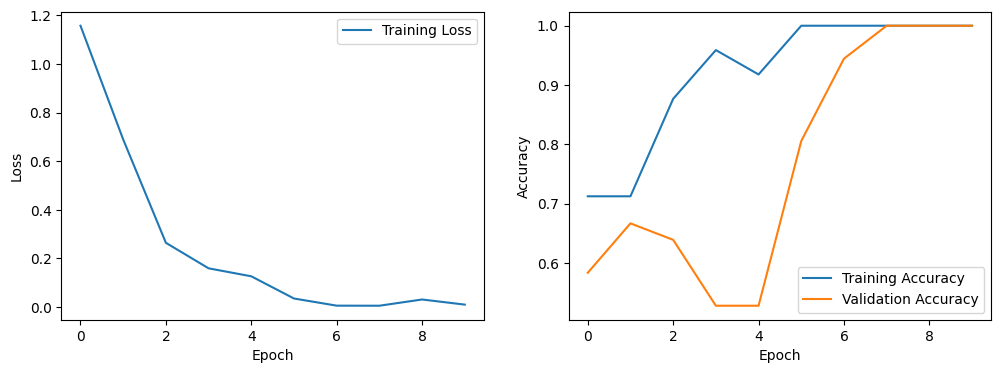

Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
[[21  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        15

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [6]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def train_and_evaluate(data_path1, data_path2, num_epochs=10):
    # Image dimensions
    height, width = 224, 224

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((height, width)),
        transforms.ToTensor(),
    ])

    # Create datasets and loaders
    train_dataset = ImageFolder(root=data_path1, transform=transform)
    test_dataset = ImageFolder(root=data_path2, transform=transform)

    # Extend train dataset with data from the second path
    train_dataset.samples += test_dataset.samples
    train_dataset.targets += test_dataset.targets

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Load pre-trained ResNet-18 model
    model = resnet18(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, 2)  # Change the output layer for binary classification
    model.train()

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Lists to store the learning curve data
    train_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        average_train_loss = running_loss / len(train_loader)
        train_losses.append(average_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Print training loss and validation accuracy
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {average_train_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')

    # Plot the learning curve
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Print final training and validation accuracy
    print(f'Final Training Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Final Validation Accuracy: {val_accuracies[-1]:.4f}')

    # Evaluation
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predictions = torch.argmax(outputs, 1)

            y_true.extend(labels.numpy())
            y_pred.extend(predictions.numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Print confusion matrix and classification report
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

# Example usage
data_path1 = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Spectrogram\Read text"
data_path2 = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Spectrogram\Spontaneous dialogue"
train_and_evaluate(data_path1, data_path2)
